In [178]:
import re
from pandas import read_csv
from numpy import corrcoef
import seaborn as sn

In [170]:
# Coleta e Tratamento dos Dados

dados = read_csv('./dados.csv')

columns = list(dados.columns)[2:]

dados = dados[dados['Região'] != 'Grande Vitória (ES)']

dados['Ano'] =  dados['Mês'].apply(lambda mes: re.findall('\d{4}',mes) [0])

dados['Mês'] = dados['Mês'].apply(lambda mes: re.findall('\w+', mes)[0])

for column in columns:
    dados[column] = dados[column].apply(lambda value: value.replace(',', '.')).astype(float)
    

In [171]:
# Calculo do IPCA Mensal

IPCA = dados['Alimentação'] * (dados['Alimentação (Peso)']/ 100)

for index in range(1,9):
    IPCA = IPCA + (dados[columns[index]] * (dados[columns[index + 9]] / 100))

dados['IPCA'] = IPCA / 9

In [172]:
# Agrupando os Dados

agrupado_regiao = dados.groupby('Região')
agrupado_ano = dados.groupby('Ano')

Alimentação
Habitação
Residência
Vestuário
Transportes
Saúde
Despesas Pessoais
Educação
Comunicação
o


<Axes: >

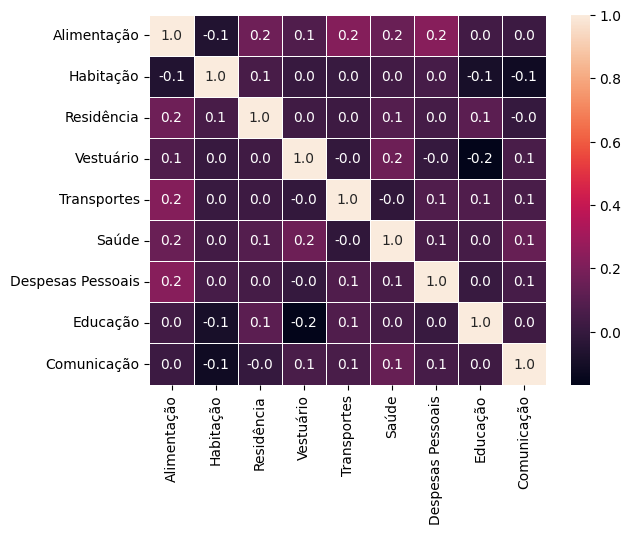

In [198]:
correlacao = dados[columns[:9]].corr()

maior = 0

for row in correlacao:
    print(row)
    
    for value in row:
        
        
        maior = maior if maior > abs(value) else value

print(value)

plot = sn.heatmap(correlacao, annot=True, fmt=".1f", linewidths=.6)

plot